# Triple Osculum

## Description:
Simulates a 3D triple pendulum and uses the coordinates of each mass to control the parameters of a triple oscillator

## Model:
<img src="rsc\triple_osculum_diagram.png" alt="triple_osculum_diagram" width="600"/>

Using Lagrangian Dynamics:

$$\frac{\partial{L}}{\partial{\theta_1}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\theta_1}}} = 0$$
$$\frac{\partial{L}}{\partial{\theta_2}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\theta_2}}} = 0$$
$$\frac{\partial{L}}{\partial{\theta_3}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\theta_3}}} = 0$$
$$\frac{\partial{L}}{\partial{\phi_1}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\phi_1}}} = 0$$
$$\frac{\partial{L}}{\partial{\phi_2}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\phi_2}}} = 0$$
$$\frac{\partial{L}}{\partial{\phi_3}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\phi_3}}} = 0$$

where $L$, the Lagrangian, is:

$$ L = \sum{T_{i}} - \sum{U_{i}}\:\:\:...\:\:\:i={1,2,3}$$ 

where $T$ the kinetic energy is:
$$T_{i} = \frac{1}{2}m_{i}(v_{x_{i}}^2 + v_{y_{i}}^2 + v_{z_{i}}^2)$$
and $U$ the potential energy is:
$$U_{i} = m_{i}gh_{i}$$

In [1]:
# Import Packages
%pip install sympy==1.6.2
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import dill
dill.settings['recurse'] = True
sym.init_printing(use_latex="mathjax", latex_mode="equation")

Note: you may need to restart the kernel to use updated packages.


Define the following parameters:

$t$ = time, $g$ = gravity, $m$ = mass, $L$ = length

Define the following state variables:

$\theta$ = angle from vertical, $\phi$ = angle around vertical

Subscripts 1...3 represent the corresponding segment of the triple pendulum.

In [2]:
# Define parameters
t, g = sym.symbols('t g')
m1, m2, m3 = sym.symbols('m1 m2 m3')
L1, L2, L3 = sym.symbols('L1 L2 L3')

# Define state variables
th1, th2, th3 = sym.symbols('theta_1 theta_2 theta_3', cls=sym.Function)
ph1, ph2, ph3 = sym.symbols('phi_1 phi_2 phi_3', cls=sym.Function)

We must make the state variables functions of time, and symbolize their derivatives

In [3]:
th1 = th1(t)
th2 = th2(t)
th3 = th3(t)
ph1 = ph1(t)
ph2 = ph2(t)
ph3 = ph3(t)

dth1 = sym.diff(th1,t)
ddth1 = sym.diff(dth1,t)
dth2 = sym.diff(th2,t)
ddth2 = sym.diff(dth2,t)
dth3 = sym.diff(th3,t)
ddth3 = sym.diff(dth3,t)

dph1 = sym.diff(ph1,t)
ddph1 = sym.diff(dph1,t)
dph2 = sym.diff(ph2,t)
ddph2 = sym.diff(dph2,t)
dph3 = sym.diff(ph3,t)
ddph3 = sym.diff(dph3,t)

display([th1, th2, th3, dth1, dth2, dth3, ddth1, ddth2, ddth3])
display([ph1, ph2, ph3, dph1, dph2, dph3, ddph1, ddph2, ddph3])

⎡                                                        2           2        
⎢                     d          d          d           d           d         
⎢θ₁(t), θ₂(t), θ₃(t), ──(θ₁(t)), ──(θ₂(t)), ──(θ₃(t)), ───(θ₁(t)), ───(θ₂(t)),
⎢                     dt         dt         dt           2           2        
⎣                                                      dt          dt         

   2       ⎤
  d        ⎥
 ───(θ₃(t))⎥
   2       ⎥
 dt        ⎦

⎡                                                        2           2        
⎢                     d          d          d           d           d         
⎢φ₁(t), φ₂(t), φ₃(t), ──(φ₁(t)), ──(φ₂(t)), ──(φ₃(t)), ───(φ₁(t)), ───(φ₂(t)),
⎢                     dt         dt         dt           2           2        
⎣                                                      dt          dt         

   2       ⎤
  d        ⎥
 ───(φ₃(t))⎥
   2       ⎥
 dt        ⎦

Define x, y, z coordinates for each endpoint of each segment:

In [4]:
x1 = L1*sym.sin(th1)*sym.cos(ph1)
y1 = L1*sym.sin(th1)*sym.sin(ph1)
z1 = -L1*sym.cos(th1)

x2 = x1 + L2*sym.sin(th2)*sym.cos(ph2)
y2 = y1 + L2*sym.sin(th2)*sym.sin(ph2)
z2 = z1 - L2*sym.cos(th2)

x3 = x2 + L3*sym.sin(th3)*sym.cos(ph3)
y3 = y2 + L3*sym.sin(th3)*sym.sin(ph3)
z3 = z2 - L3*sym.cos(th3)

display(x3)
display(y3)
display(z3)

L₁⋅sin(θ₁(t))⋅cos(φ₁(t)) + L₂⋅sin(θ₂(t))⋅cos(φ₂(t)) + L₃⋅sin(θ₃(t))⋅cos(φ₃(t))

L₁⋅sin(φ₁(t))⋅sin(θ₁(t)) + L₂⋅sin(φ₂(t))⋅sin(θ₂(t)) + L₃⋅sin(φ₃(t))⋅sin(θ₃(t))

-L₁⋅cos(θ₁(t)) - L₂⋅cos(θ₂(t)) - L₃⋅cos(θ₃(t))

Creating functionals

In [5]:
x1f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), x1)
y1f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), y1)
z1f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), z1)

x2f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), x2)
y2f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), y2)
z2f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), z2)

x3f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), x3)
y3f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), y3)
z3f = sym.lambdify((th1, th2, th3, ph1, ph2, ph3, L1, L2, L3), z3)

Calculating the Lagrangian

In [6]:
# Kinetic energy for each component
T1 = 1/2 * m1 * (sym.diff(x1, t)**2 + sym.diff(y1, t)**2 + sym.diff(z1, t)**2)
T2 = 1/2 * m2 * (sym.diff(x2, t)**2 + sym.diff(y2, t)**2 + sym.diff(z2, t)**2)
T3 = 1/2 * m3 * (sym.diff(x3, t)**2 + sym.diff(y3, t)**2 + sym.diff(z3, t)**2)
T = T1 + T2 + T3 # Total kinetic energy

display(T)
# Potential energy for each component
U1 = m1*g*z1 
U2 = m2*g*z2
U3 = m3*g*z3
U = U1 + U2 + U3 # Total potential energy
display(U)

L = T - U # Lagrangian
display(L)

       ⎛                           2                                          
       ⎜  2    2        ⎛d        ⎞    ⎛                           d          
0.5⋅m₁⋅⎜L₁ ⋅sin (θ₁(t))⋅⎜──(θ₁(t))⎟  + ⎜- L₁⋅sin(φ₁(t))⋅sin(θ₁(t))⋅──(φ₁(t)) +
       ⎝                ⎝dt       ⎠    ⎝                           dt         

                                    2                                         
                          d        ⎞    ⎛                         d           
 L₁⋅cos(φ₁(t))⋅cos(θ₁(t))⋅──(θ₁(t))⎟  + ⎜L₁⋅sin(φ₁(t))⋅cos(θ₁(t))⋅──(θ₁(t)) + 
                          dt       ⎠    ⎝                         dt          

                                   2⎞          ⎛                              
                         d        ⎞ ⎟          ⎜⎛              d              
L₁⋅sin(θ₁(t))⋅cos(φ₁(t))⋅──(φ₁(t))⎟ ⎟ + 0.5⋅m₂⋅⎜⎜L₁⋅sin(θ₁(t))⋅──(θ₁(t)) + L₂⋅
                         dt       ⎠ ⎠          ⎝⎝              dt             

                     2                           

-L₁⋅g⋅m₁⋅cos(θ₁(t)) + g⋅m₂⋅(-L₁⋅cos(θ₁(t)) - L₂⋅cos(θ₂(t))) + g⋅m₃⋅(-L₁⋅cos(θ₁
(t)) - L₂⋅cos(θ₂(t)) - L₃⋅cos(θ₃(t)))

                                                                              
                                                                              
L₁⋅g⋅m₁⋅cos(θ₁(t)) - g⋅m₂⋅(-L₁⋅cos(θ₁(t)) - L₂⋅cos(θ₂(t))) - g⋅m₃⋅(-L₁⋅cos(θ₁(
                                                                              

                                              ⎛                           2   
                                              ⎜  2    2        ⎛d        ⎞    
t)) - L₂⋅cos(θ₂(t)) - L₃⋅cos(θ₃(t))) + 0.5⋅m₁⋅⎜L₁ ⋅sin (θ₁(t))⋅⎜──(θ₁(t))⎟  + 
                                              ⎝                ⎝dt       ⎠    

                                                                           2  
⎛                           d                                    d        ⎞   
⎜- L₁⋅sin(φ₁(t))⋅sin(θ₁(t))⋅──(φ₁(t)) + L₁⋅cos(φ₁(t))⋅cos(θ₁(t))⋅──(θ₁(t))⎟  +
⎝                           dt                                   dt       ⎠   

                                                 

Calculate the Lagrangian derivatives:

In [7]:
# Commented out for speed, solutions loaded in from files.

# LD_th1 = (sym.diff(L, th1) - sym.diff(sym.diff(L, dth1), t)).simplify()
# LD_th2 = (sym.diff(L, th2) - sym.diff(sym.diff(L, dth2), t)).simplify()
# LD_th3 = (sym.diff(L, th3) - sym.diff(sym.diff(L, dth3), t)).simplify()
# LD_ph1 = (sym.diff(L, ph1) - sym.diff(sym.diff(L, dph1), t)).simplify()
# LD_ph2 = (sym.diff(L, ph2) - sym.diff(sym.diff(L, dph2), t)).simplify()
# LD_ph3 = (sym.diff(L, ph3) - sym.diff(sym.diff(L, dph3), t)).simplify()

# dill.dump(LD_th1, open("LD_th1", "wb"))
# dill.dump(LD_th2, open("LD_th2", "wb"))
# dill.dump(LD_th3, open("LD_th3", "wb"))
# dill.dump(LD_ph1, open("LD_ph1", "wb"))
# dill.dump(LD_ph2, open("LD_ph2", "wb"))
# dill.dump(LD_ph3, open("LD_ph3", "wb"))

# LD_th1 = dill.load(open("LD_th1", "rb"))
# LD_th2 = dill.load(open("LD_th2", "rb"))
# LD_th3 = dill.load(open("LD_th3", "rb"))
# LD_ph1 = dill.load(open("LD_ph1", "rb"))
# LD_ph2 = dill.load(open("LD_ph2", "rb"))
# LD_ph3 = dill.load(open("LD_ph3", "rb"))

Solve the equations in the form: 
$\frac{\partial{L}}{\partial{\theta_i}} - \frac{d}{dr}\frac{\partial{L}}{\partial{\dot{\theta_i}}} = 0$
using the sym.solve function (assumes expressions are = 0)

In [8]:
# Commented out for speed, solutions loaded in from files.
# sols = sym.solve([LD_th1, LD_th2, LD_th3, LD_ph1, LD_ph2, LD_ph3], (ddth1, ddth2, ddth3, ddph1, ddph2, ddph3), simplify=False, rational=False)
# dill.dump(sols, open("sols", "wb"))
# sols = dill.load(open("sols", "rb"))

Now we need to convert the six second-order ODEs to 12 first-order ODEs by substitution of variables

$ a_1 = \frac{d\theta_1}{dt}\:\: \therefore \:\: \frac{da_1}{dt} = \frac{d^2\theta_1}{dt^2}$

$ a_2 = \frac{d\theta_2}{dt}\:\: \therefore \:\: \frac{da_2}{dt} = \frac{d^2\theta_2}{dt^2}$

$ a_3 = \frac{d\theta_3}{dt}\:\: \therefore \:\: \frac{da_3}{dt} = \frac{d^2\theta_3}{dt^2}$

$ b_1 = \frac{d\phi_1}{dt}\:\: \therefore \:\: \frac{db_1}{dt} = \frac{d^2\phi_1}{dt^2}$

$ b_2 = \frac{d\phi_2}{dt}\:\: \therefore \:\: \frac{db_2}{dt} = \frac{d^2\phi_2}{dt^2}$

$ b_3 = \frac{d\phi_3}{dt}\:\: \therefore \:\: \frac{db_3}{dt} = \frac{d^2\phi_3}{dt^2}$

Therefore our 12 equations that will be entered into the solver are as follows:

$(1):\:\:\ \frac{d\theta_1}{dt} = a_1 $

$(2):\:\:\ \frac{da_1}{dt} = sym.solve(\frac{d^2\theta_1}{dt^2})$

$(3):\:\:\ \frac{d\theta_2}{dt} = a_2 $

$(4):\:\:\ \frac{da_2}{dt} = sym.solve(\frac{d^2\theta_2}{dt^2})$

$(5):\:\:\ \frac{d\theta_3}{dt} = a_3 $

$(6):\:\:\ \frac{da_3}{dt} = sym.solve(\frac{d^2\theta_3}{dt^2})$

$(7):\:\:\ \frac{d\phi_1}{dt} = b_1 $

$(8):\:\:\ \frac{db_1}{dt} = sym.solve(\frac{d^2\phi_1}{dt^2})$

$(9):\:\:\ \frac{d\phi_2}{dt} = b_2 $

$(10):\:\:\ \frac{db_2}{dt} = sym.solve(\frac{d^2\phi_2}{dt^2})$

$(11):\:\:\ \frac{d\phi_3}{dt} = b_3 $

$(12):\:\:\ \frac{db_3}{dt} = sym.solve(\frac{d^2\phi_3}{dt^2})$

First, convert to numerical expressions:

In [9]:
# da1dt = sym.lambdify((t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, dth1, dth2, dth3, ph1, ph2, ph3, dph1, dph2, dph3), sols[ddth1])
# da2dt = sym.lambdify((t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, dth1, dth2, dth3, ph1, ph2, ph3, dph1, dph2, dph3), sols[ddth2])
# da3dt = sym.lambdify((t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, dth1, dth2, dth3, ph1, ph2, ph3, dph1, dph2, dph3), sols[ddth3])
# dth1dt = sym.lambdify(dth1, dth1)
# dth2dt = sym.lambdify(dth2, dth2)
# dth3dt = sym.lambdify(dth3, dth3)

# db1dt = sym.lambdify((t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, dth1, dth2, dth3, ph1, ph2, ph3, dph1, dph2, dph3), sols[ddph1])
# db2dt = sym.lambdify((t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, dth1, dth2, dth3, ph1, ph2, ph3, dph1, dph2, dph3), sols[ddph2])
# db3dt = sym.lambdify((t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, dth1, dth2, dth3, ph1, ph2, ph3, dph1, dph2, dph3), sols[ddph3])
# dph1dt = sym.lambdify(dph1, dph1)
# dph2dt = sym.lambdify(dph2, dph2)
# dph3dt = sym.lambdify(dph3, dph3)

# dill.dump(da1dt, open("da1dt", "wb"))
# dill.dump(da2dt, open("da2dt", "wb"))
# dill.dump(da3dt, open("da3dt", "wb"))
# dill.dump(dth1dt, open("dth1dt", "wb"))
# dill.dump(dth2dt, open("dth2dt", "wb"))
# dill.dump(dth3dt, open("dth3dt", "wb"))

# dill.dump(db1dt, open("db1dt", "wb"))
# dill.dump(db2dt, open("db2dt", "wb"))
# dill.dump(db3dt, open("db3dt", "wb"))
# dill.dump(dph1dt, open("dph1dt", "wb"))
# dill.dump(dph2dt, open("dph2dt", "wb"))
# dill.dump(dph3dt, open("dph3dt", "wb"))

da1dt = dill.load(open("da1dt", "rb"))
da2dt = dill.load(open("da2dt", "rb"))
da3dt = dill.load(open("da3dt", "rb"))
dth1dt = dill.load(open("dth1dt", "rb"))
dth2dt = dill.load(open("dth2dt", "rb"))
dth3dt = dill.load(open("dth3dt", "rb"))

db1dt = dill.load(open("db1dt", "rb"))
db2dt = dill.load(open("db2dt", "rb"))
db3dt = dill.load(open("db3dt", "rb"))
dph1dt = dill.load(open("dph1dt", "rb"))
dph2dt = dill.load(open("dph2dt", "rb"))
dph3dt = dill.load(open("dph3dt", "rb"))

The state vector becomes:

$$\vec{s} = \begin{bmatrix}\theta_1\\ \theta_2\\ \theta_3\\ \phi_1\\ \phi_2\\ \phi_3\\ a_1\\ a_2\\ a_3\\ b_1\\ b_2\\ b_3 \end{bmatrix}$$

Thus the state derivative becomes:

$$
\frac{d\vec{s}}{dt} = 
\begin{bmatrix}
d\theta_1/dt\\ d\theta_2/dt\\ d\theta_3/dt\\ d\phi_1/dt\\ d\phi_2/dt\\ d\phi_3/dt\\
da_1/dt\\ da_2/dt\\ da_3/dt\\ db_1/dt\\ db_2/dt\\ db_3/dt\\
\end{bmatrix}
$$

In [10]:
def dsdt(t, S, g, m1, m2, m3, L1, L2, L3):
    th1, th2, th3, ph1, ph2, ph3, a1, a2, a3, b1, b2, b3 = S
    return [
        dth1dt(a1),
        dth2dt(a2),
        dth3dt(a3),
        dph1dt(b1),
        dph2dt(b2),
        dph3dt(b3),
        da1dt(t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, a1, a2, a3, ph1, ph2, ph3, b1, b2, b3),
        da2dt(t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, a1, a2, a3, ph1, ph2, ph3, b1, b2, b3),
        da3dt(t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, a1, a2, a3, ph1, ph2, ph3, b1, b2, b3),
        db1dt(t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, a1, a2, a3, ph1, ph2, ph3, b1, b2, b3),
        db2dt(t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, a1, a2, a3, ph1, ph2, ph3, b1, b2, b3),
        db3dt(t, g, m1, m2, m3, L1, L2, L3, th1, th2, th3, a1, a2, a3, ph1, ph2, ph3, b1, b2, b3)
    ]

t0 = 0
tf = 10
s0 = [np.pi/5, np.pi/6, np.pi/8, np.pi/5, np.pi/6, np.pi/8, 0, 0, 0, 0, 0, 0]
g = 9.81
m1 = 2.
m2 = 4.
m3 = 5.
L1 = 1.6
L2 = 2.
L3 = 2.2

solution = sp.integrate.solve_ivp(dsdt,(t0, tf), s0, args=(g, m1, m2, m3, L1, L2, L3)) # ~ 2 minutes to compute for 10 seconds sim time.
t = solution.t # time array
y = solution.y # state array
display(t.shape, y.shape)

(185,)

(12, 185)

## Plotting

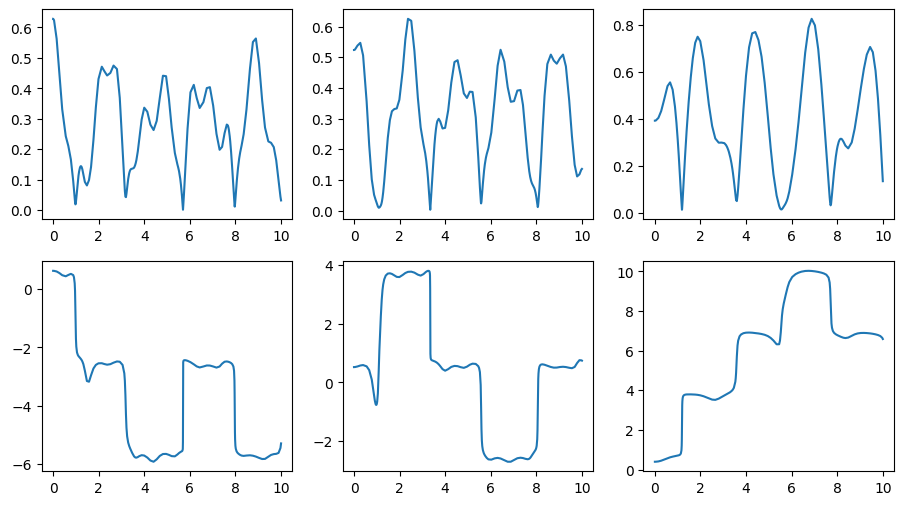

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(11,6))

ax[0,0].plot(t, y[0,:])
ax[0,1].plot(t, y[1,:])
ax[0,2].plot(t, y[2,:])
ax[1,0].plot(t, y[3,:])
ax[1,1].plot(t, y[4,:])
ax[1,2].plot(t, y[5,:])